# 1 Setup

Importing a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. 

Check that Python 3.5 or later is installed

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Importing useful libraries
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 2 Binary Classification

Read the contents of training.csv and testing.csv. It is assumed that both datasets are present in the root directory of this project

In [2]:
import pandas as pd

testing_data = pd.read_csv('testing.csv')
training_data = pd.read_csv('training.csv')

## 2.1 Display the first lines and visualise dataset

### 2.1.1 Display the Training Dataset

In [3]:
# Displaying the first 5 rows of the dataset
training_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [4]:
training_data.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,58.021538,38.381538,61.467692,96.175385,58.098462,99.196923,85.864615,27.375385,58.880000,55.786769,...,-3.341446,-20.004954,-1.086092,-4.375846,-21.664185,-0.979815,-4.633323,-18.996462,-1.701785,-4.229108
std,11.705076,14.589516,15.003385,11.120136,10.654920,9.438789,16.642765,7.445316,8.884777,12.347445,...,8.921301,2.908311,1.054544,1.850954,3.594512,0.308081,1.054033,3.307265,1.017594,1.150070
min,31.000000,23.000000,47.000000,69.000000,43.000000,83.000000,42.000000,19.000000,45.000000,4.950000,...,-58.280000,-26.790000,-5.510000,-10.120000,-34.630000,-1.830000,-7.970000,-29.340000,-6.500000,-8.930000
25%,50.000000,28.000000,52.000000,89.000000,51.000000,93.000000,73.000000,24.000000,54.000000,48.370000,...,-4.660000,-22.250000,-1.750000,-5.530000,-24.220000,-1.190000,-5.410000,-21.780000,-2.360000,-4.870000
50%,57.000000,32.000000,55.000000,95.000000,54.000000,96.000000,85.000000,25.000000,57.000000,57.560000,...,-1.250000,-19.950000,-1.030000,-4.490000,-21.040000,-0.990000,-4.670000,-18.870000,-1.650000,-4.150000
75%,65.000000,43.000000,65.000000,103.000000,63.000000,103.000000,98.000000,27.000000,60.000000,64.120000,...,1.430000,-18.250000,-0.390000,-2.770000,-19.060000,-0.780000,-3.900000,-16.770000,-1.030000,-3.290000
max,107.000000,91.000000,124.000000,141.000000,100.000000,138.000000,136.000000,84.000000,114.000000,86.080000,...,9.580000,-7.760000,1.780000,1.040000,-12.070000,0.260000,-0.770000,-8.330000,2.580000,-0.590000


**TO DO describe the cells below** - watch the lecture on this part?

### 2.1.2 Displaying the Testing Dataset

In [5]:
# Displaying the first 5 rows of the dataset
testing_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [6]:
testing_data.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,62.949495,41.020202,63.676768,101.409091,58.732323,100.651515,90.601010,28.691919,61.116162,50.818889,...,-5.594141,-20.037576,-1.007121,-4.355657,-20.996919,-0.973737,-4.597626,-18.840000,-1.570808,-4.155859
std,12.779563,17.832543,17.314545,14.804627,12.392648,11.190314,15.588861,8.977752,9.787158,12.842321,...,9.769193,4.948562,1.783671,2.352311,6.490763,0.702619,1.736712,5.251095,1.807792,1.982423
min,34.000000,25.000000,47.000000,54.000000,44.000000,84.000000,54.000000,21.000000,50.000000,7.660000,...,-53.530000,-32.950000,-8.800000,-11.210000,-40.370000,-3.270000,-8.730000,-34.140000,-8.870000,-10.830000
25%,54.000000,28.000000,52.000000,92.250000,49.000000,92.000000,80.000000,24.000000,55.000000,40.667500,...,-6.627500,-23.325000,-1.860000,-5.790000,-24.090000,-1.290000,-5.747500,-22.237500,-2.370000,-5.122500
50%,60.000000,31.500000,57.000000,99.500000,55.000000,98.000000,91.000000,25.000000,58.000000,53.030000,...,-2.255000,-20.020000,-0.970000,-4.350000,-20.465000,-0.945000,-4.540000,-19.200000,-1.420000,-4.125000
75%,70.750000,50.750000,69.000000,111.750000,65.000000,107.000000,101.000000,27.000000,63.000000,59.920000,...,0.247500,-17.787500,-0.042500,-2.882500,-17.955000,-0.642500,-3.617500,-16.227500,-0.655000,-3.105000
max,105.000000,160.000000,196.000000,172.000000,98.000000,136.000000,139.000000,82.000000,109.000000,83.320000,...,5.740000,5.130000,12.460000,7.370000,1.880000,3.440000,3.940000,3.670000,8.840000,7.790000


## 2.2 Simplifying the Classification Task

In order to simplify the classification task, the following scripts will delete all columns whose names begins with pred_minus_obs. This will leave 9 columns (features) for the training and test sets. 

In [7]:
# Defining a function that allows us to drop all cols that start with a string
def drop_cols(dataframe, start_string):
    cols = list(dataframe) # create a list of dataframe columns
    for i in cols:
        if i.startswith(start_string):
            dataframe.drop(i, axis=1, inplace=True)

In [8]:
# Drop the columns from the two datasets 
drop_cols(training_data, 'pred_minus_obs')
drop_cols(testing_data, 'pred_minus_obs')

In [9]:
training_data.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,67,51,68,115,69,111,136,31,67
1,s,67,28,51,99,50,97,82,26,59
2,s,63,26,50,95,49,91,81,26,57
3,d,63,42,63,97,66,108,111,28,59
4,s,46,27,50,83,51,90,76,26,56


## 2.3 Visualizing the Data

### 2.3.1 Visualizing the Training Set

Saving figure attribute_histogram_plots_training


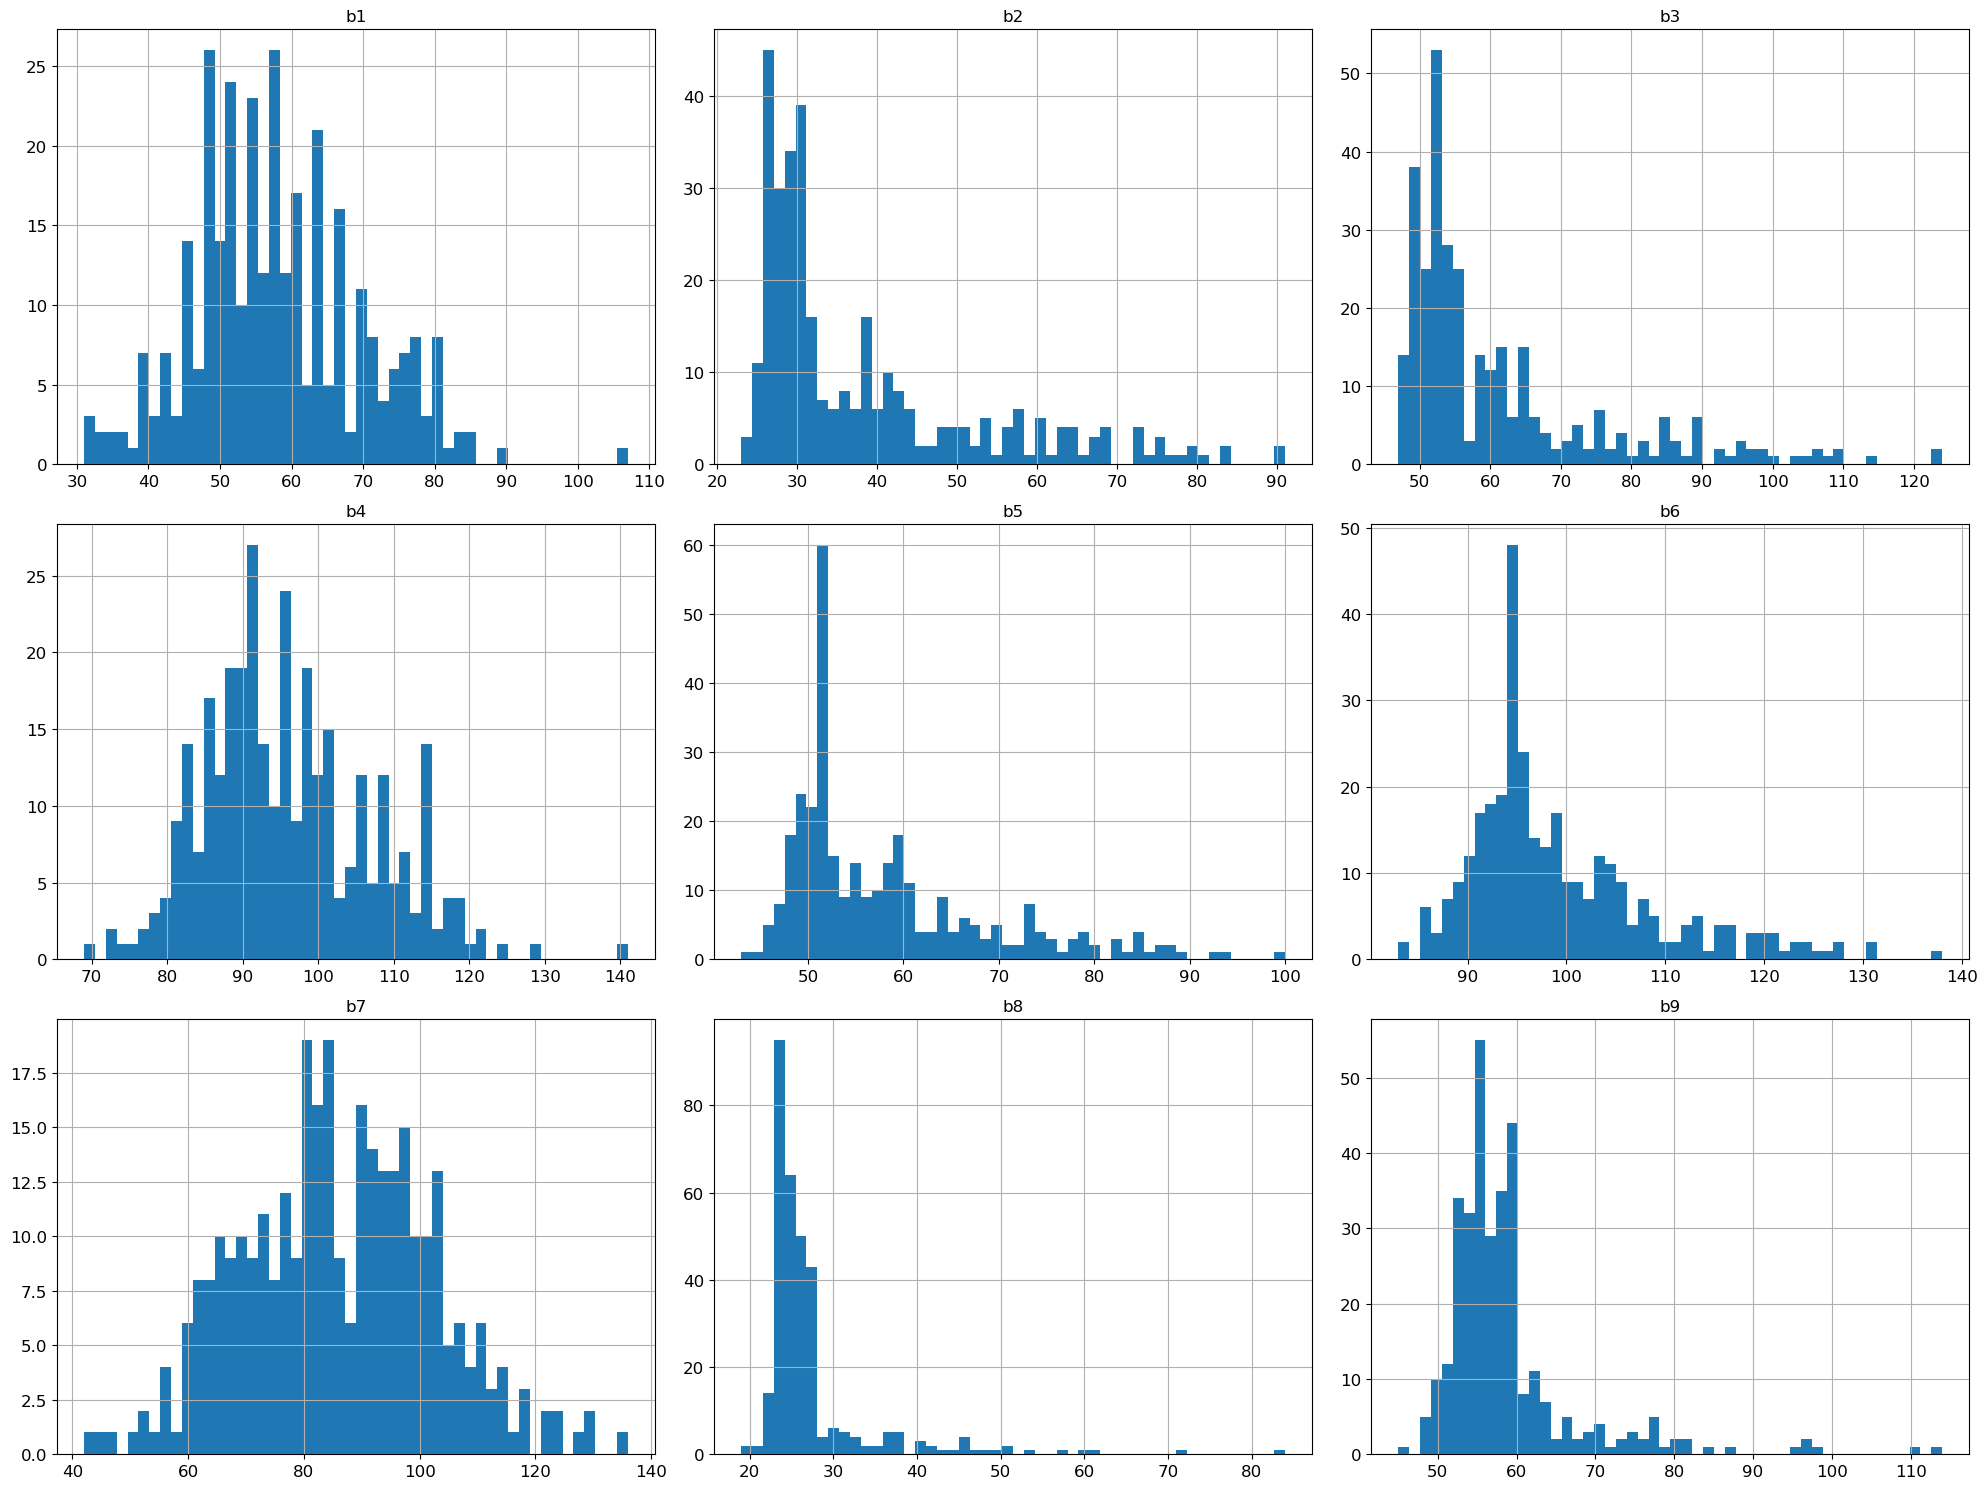

In [10]:
# Plotting the different attributes/columns in the dataset

%matplotlib inline
import matplotlib.pyplot as plt
training_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_training")
plt.show()

The majority of the histograms for each attribute are bell shaped. However, each arrtibute is skewed either to the left or the right.

### Visualizing the Testing Set

Saving figure attribute_histogram_plots_testing


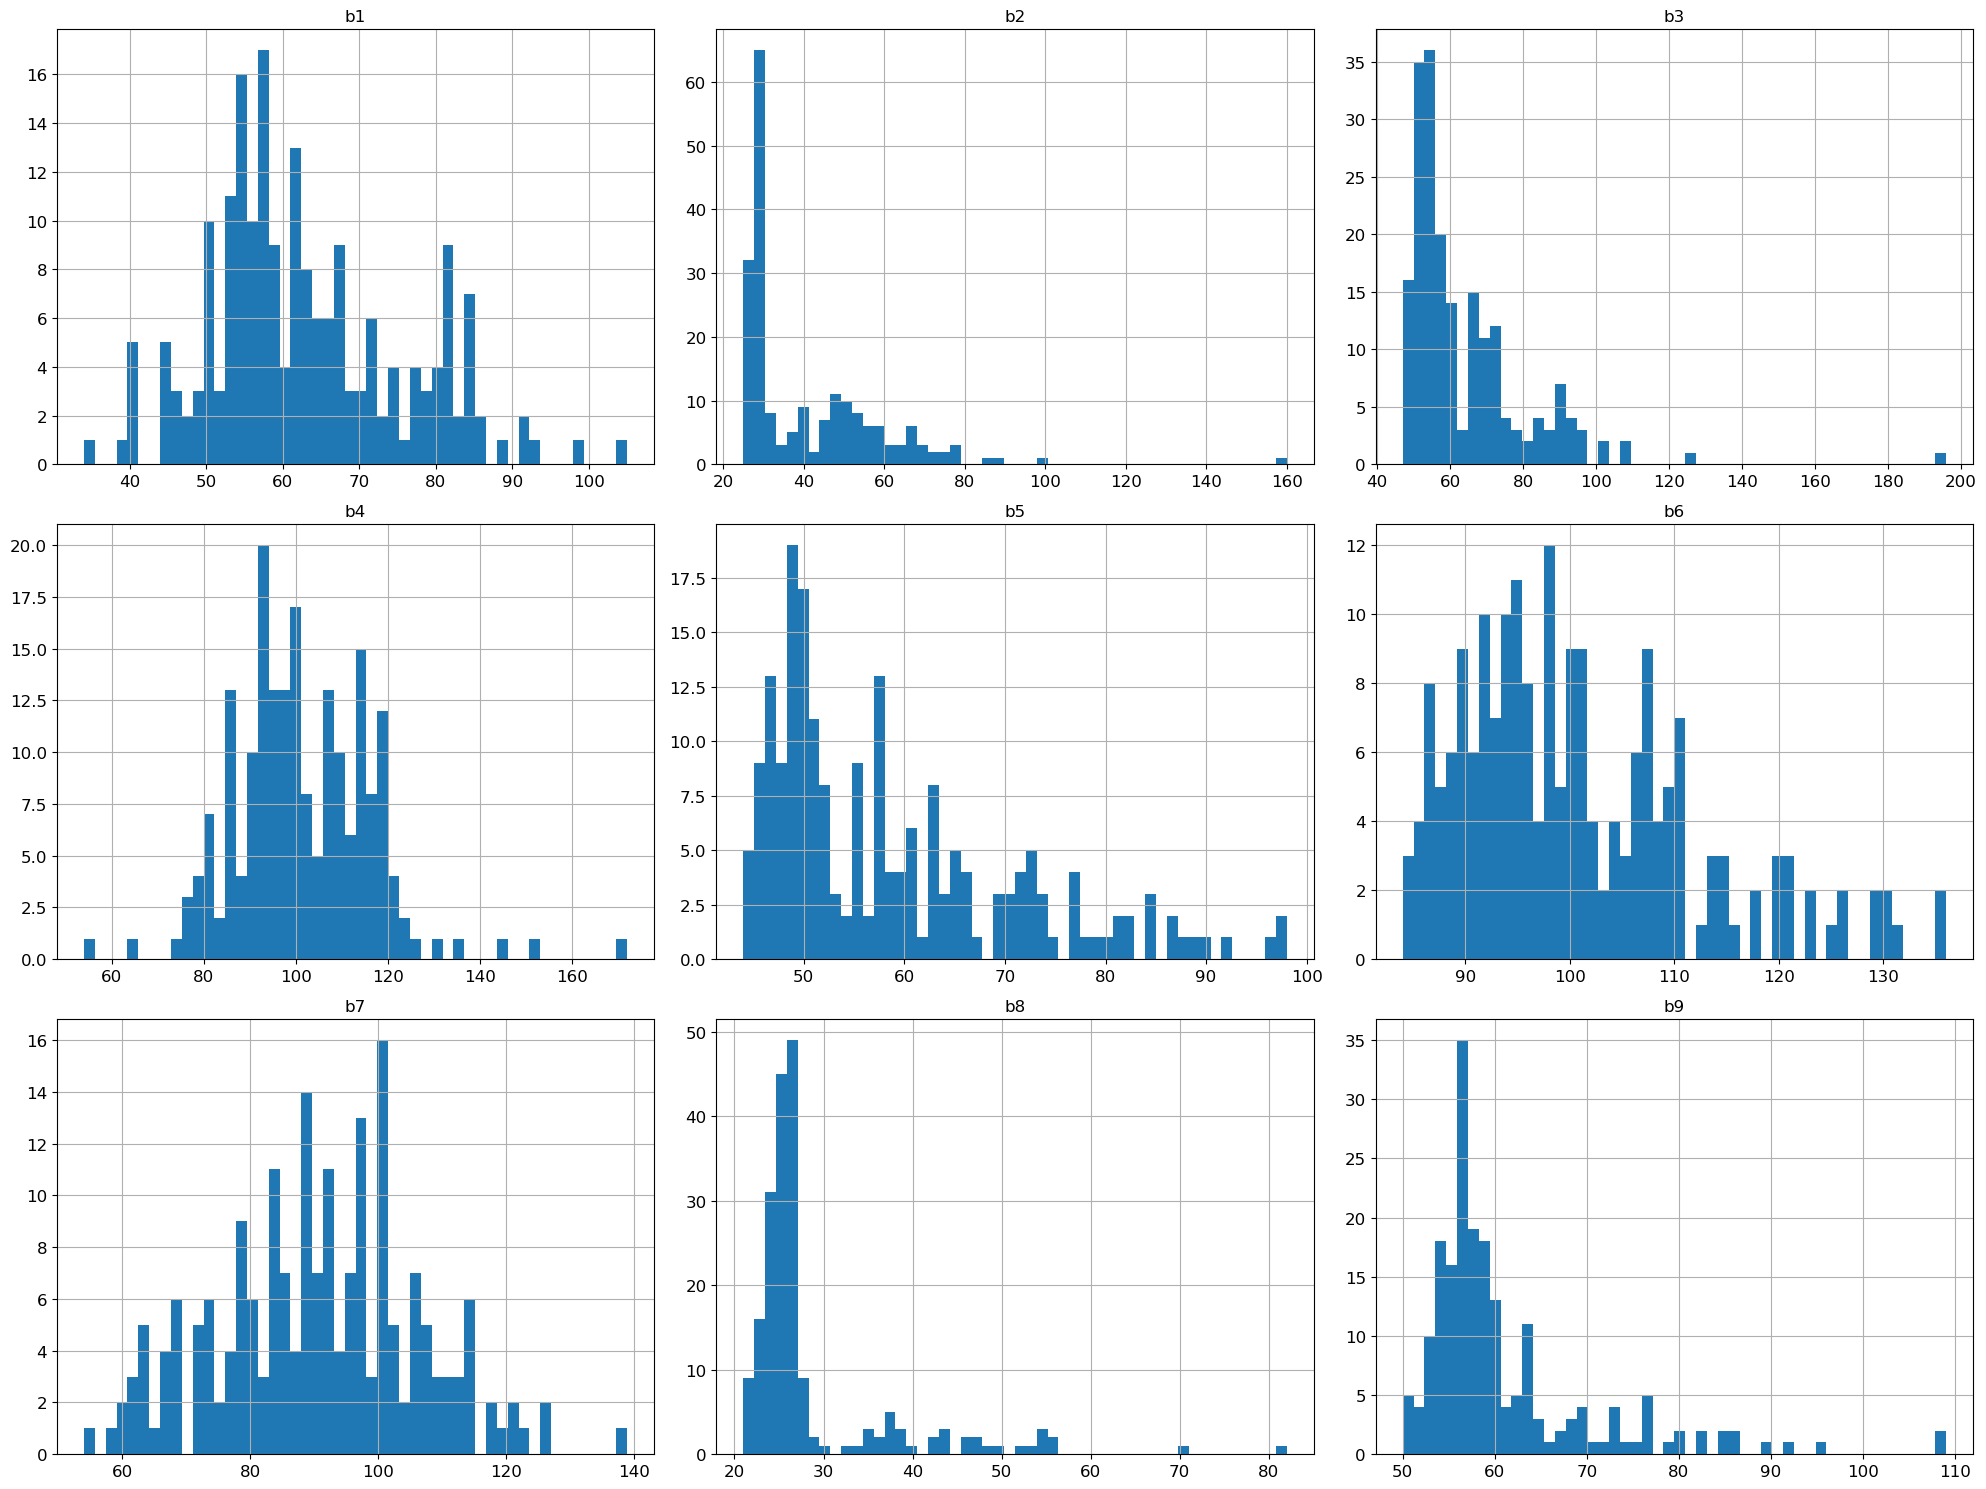

In [11]:
# Plotting the different attributes/columns in the dataset

%matplotlib inline
import matplotlib.pyplot as plt
testing_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots_testing")
plt.show()

## 2.4 Counting Instances

The following code counts the number of instances for each class label in order to determine if we have a balanced dataset. We can view the output of the count_instances() function to determine the number of non-null instances in the dataset.

It can be observed that the training data has an abundance of values for the s and d class label but a significantly lower proportion for values in the o and h class label.

The testing data is more balanced in terms of s, d and h. However, it is also lacking in values for o. 

In [12]:
testing_data["class"].value_counts()

s    59
d    54
h    48
o    37
Name: class, dtype: int64

In [13]:
training_data["class"].value_counts()

s    136
d    105
o     46
h     38
Name: class, dtype: int64

## 2.5 Feature Scaling

The following code performs appropirate feature scaling on the datasets before doing the classification. The StandardScaler function from the sklearn.preprocessing package is used for this purpose. Standardization scales the data to have a mean value of 0 and standard deviation of 1. This makes it more useful for the classification tasks that we are about to attempt.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

training_num = training_data.drop(["class"], axis=1)
testing_num = testing_data.drop(["class"], axis=1)

S_training = scaler.fit_transform(training_num)
S_testing = scaler.fit_transform(testing_num)

# Scaled training data
training_X = pd.DataFrame(S_training, columns=training_num.columns)
training_y = training_data["class"]

# Scaled testing data
testing_X = pd.DataFrame(S_testing, columns=testing_num.columns)
testing_y = testing_data["class"]

## 2.6 Logistic Regression Classifer 

In this section we will be using the logistic regression classifier found in sklearn.linear model to perform binary classification using examples from two classes: 's' and 'd'

In [15]:
# This function removes instances of 'o' and 'h' from the dataset

def remove_data(setX, setY, label1, label2):
    for i in setY.index:
        if (setY[i].startswith(label1) or setY[i].startswith(label2)):
            setX.drop(i, axis='index', inplace=True)
            setY.drop(i, axis='index', inplace=True)
    return setX, setY

In [16]:
import copy

# This function removes all but the feature we want to keep
def prep_bin_data(feature, setX):
    print(feature)
    col1 = copy.deepcopy(setX)
    for col in col1.columns:
        if col != feature:
            drop_cols(col1, col)
    return col1

In [17]:
# Removing 'o' and 'h' from the datasets
train_X, train_y = remove_data(training_X, training_y, 'o', 'h')
test_X, test_y = remove_data(testing_X, testing_y, 'o', 'h')

### 2.6.1 Binary Classification using feature b1

This feature was chosen as the values in this data set follow a normal distribution

In [34]:
# Removes all other features from the dataset

x = prep_bin_data('b1', train_X)

b1


In [35]:
x.head()

,b1
0,0.768240
1,0.768240
2,0.425981
3,0.425981
4,-1.028620


In [36]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(x.values, train_y.values)

LogisticRegression(random_state=42)

Saving figure logistic_regression_plot


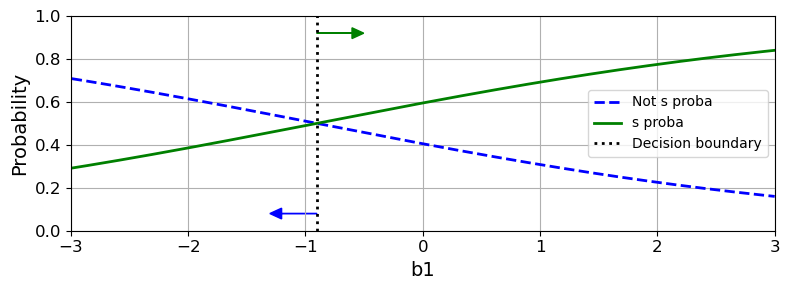

In [37]:
X_new = np.linspace(-4, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not s proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="s proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.xlabel("b1")
plt.ylabel("Probability")
plt.legend(loc="center right")
plt.axis([-3, 3, 0, 1])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

In [32]:
decision_boundary

-4.0

### 2.6.2 Binary Classification using feature b7

This feature was chosen as the values in this data set follow a normal distribution

In [23]:
# Removes all other features from the dataset

x = prep_bin_data('b7', train_X)

b7


In [24]:
x.min()

b7   -2.459185
dtype: float64

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(x.values, train_y.values)

LogisticRegression(random_state=42)

Saving figure logistic_regression_plot


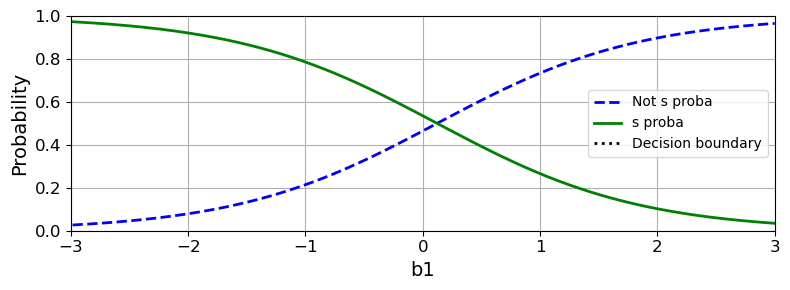

In [26]:
X_new = np.linspace(-4, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not s proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="s proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.xlabel("b7")
plt.ylabel("Probability")
plt.legend(loc="center right")
plt.axis([-3, 3, 0, 1])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

In [27]:
decision_boundary

-4.0